# Laboratório #2

### Instruções

1. Antes de começar, você deve clicar na opção "Copiar para o Drive" na barra superior do Colab. Depois de clicar nela, verifique se você está trabalhando nessa versão do notebook para que seu trabalho seja salvo.
2. Quando você terminar os exercícios do laboratório, vá ao menu do Colab ou Jupyter e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb.
    * Este deve ser o arquivo que você irá entregar.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
3. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este laboratório e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.
4. Não se esqueça de colocar seu **nome** e **matrícula** na célula de texto abaixo.

**Nome**:

**Matrícula**:

## Exercícios

#### 1)  Neste exercício, você irá usar a regra de aprendizagem do perceptron para encontrar os pesos da função discriminante, calcular os erros de treinamento e validação e plotar as regiões de decisão de um classificador com limiar decisão rígido.

1. Execute a célula abaixo e analise a figura gerada. A figura mostra os exemplos de duas classes.

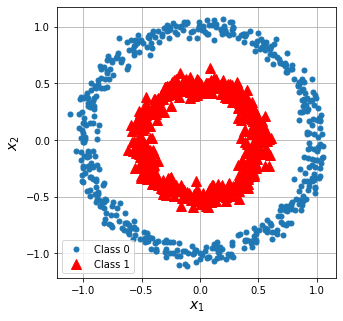

In [ ]:
# Import all necessary libraries.
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

# Define a seed.
seed = 42
# Reset the PN sequence generator.
np.random.seed(seed)
random.seed(seed)

# Number of examples.
N = 1000

# Create a 2-class dataset for classification.
# Factor: Scale factor between inner and outer circle.
X, y = make_circles(n_samples=N, factor=.5, noise=.05, random_state=seed)

# Plot the two circles.
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
fig = plt.figure(figsize=(5,5))
plt.plot(X[idx0,0], X[idx0,1], '.', markersize=10, label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'r^', markersize=10, label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

 2. Depois de analisar a figura acima, responda:

+ Qual tipo de função discriminante (linear ou não-linear) seria necesária para se separar estas duas classes?
+ Qual formato esta função discriminante deve ter (ou seja, qual tipo de equação)?

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

3. Execute a célula abaixo para definir as funções necessárias para se resolver este exercício.

In [ ]:
def classifier(X, a):
    '''Função que realiza a classificação. Implementa a função hipótese de classificação.'''
    # Função discriminante.
    g = X.dot(a)
    # Função de limiar de decisão rígido. A saída será igual a '1' quando g = 0.
    h = np.heaviside(g, 1.0)
    return h

def error_function(X, a, y):
    '''Função para cálculo do erro médio de classificação.'''
    h = classifier(X, a)
    error = 0.0
    for i in range(0, len(y)):
        error += np.power(y[i,0] - h[i,0], 2.0) # (y - h)^2
    return error/len(y)

def accuracy(y_pred, y):
    '''Função para cálculo da acurácia do classificador.'''
    acc = 0
    for i in range(len(y)):
        if(y[i]==y_pred[i]):
            acc += 1
    return acc/len(y)

def fit(X_train, y_train, X_test, y_test, alpha, numEpochs):
    '''Treinamento do classificador com limiar de decisão rígido.'''

    # Reshaping into column vectors.
    y_train = y_train.reshape(len(y_train), 1)
    y_test = y_test.reshape(len(y_test), 1)

    # Random initialization of parameters.
    a = np.random.randn(X_train.shape[1], 1)

    # Create an array for storing error values.
    Jgd = np.zeros(numEpochs*len(y_train)+1) # training error
    Jgd_v = np.zeros(numEpochs*len(y_train)+1) # validation error.

    # Calculate initial error.
    Jgd[0] = error_function(X_train, a, y_train)
    Jgd_v[0] = error_function(X_test, a, y_test)

    # Batch gradient-descent loop.
    minimum_val_error = float("inf")
    iteration = 0
    epoch = 0
    N = len(y_train) # retrieve number of training samples.
    a_min = np.zeros((X_train.shape[1], 1))
    while epoch < numEpochs:

        # Shuffle the whole dataset before every epoch.
        sdsi = random.sample(range(0, N), N)

        # Iteration loop.
        for idx in range(0, N):
            # Draw a random pair of training samples.
            rndidx = sdsi[idx]
            x = X_train[rndidx,:].reshape(1, X_train.shape[1]) # One attribute vector
            y = y_train[rndidx] # corresponding expected output (label) to the attribute.

            # Update weights.
            update = x.T.dot(y - classifier(x, a))
            a = a + alpha * update

            # Calculating training and validation errors.
            Jgd[iteration+1] = error_function(X_train, a, y_train)
            Jgd_v[iteration+1] = error_function(X_test, a, y_test)

            # Early-stop: store weights for the smallest error ever.
            if(Jgd_v[iteration+1] < minimum_val_error):
                minimum_val_error = Jgd_v[iteration+1]
                a_min = a

            # Increment iteration.
            iteration += 1

        # Increment epoch.
        epoch += 1

    # Return all variables.
    return Jgd, Jgd_v, iteration, a_min, minimum_val_error, a

4. Analise o código da função `fit`, a qual foi definida acima, e responda:

   + Com relação à quantidade de exemplos e como eles são amostrados do conjunto de treinamento, como é feita a atualização dos pesos?

**DICA**
+ Reveja os slides 14 a 18 do documento `Classificação (Parte II)`.

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

5. Divida o conjunto total de exemplos em 70% para treinamento e 30% para validação.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classificador_linear_com_limiar_rigido.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classificador_linear_com_limiar_rigido.ipynb).

In [ ]:
# Digite aqui o código do exercício.

6. De posse do formato que a função discriminante deve ter para separar as duas classes, altere as matrizes de atributos de treinamento e validação para que elas implementem este formato de função discriminante.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classificador_linear_com_limiar_rigido.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classificador_linear_com_limiar_rigido.ipynb).

In [ ]:
# Digite aqui o código do exercício.

7. Treine o classificador usando a função `fit` com `alpha = 0.1` e `numEpochs = 2`. Após o treinamento, calcule e imprima a acurácia obtida pelo classificador no conjunto de validação.

**DICAS**

+ Para calcular a acurácia, use a função `accuracy` definida no item 3 deste exercício.
+ Para resolver este item, se baseie no código do seguinte exemplo: [classificador_linear_com_limiar_rigido.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classificador_linear_com_limiar_rigido.ipynb).

In [ ]:
# Digite aqui o código do exercício.

8. Crie um gráfico que mostre os erros de treinamento e validação em função das iterações de aprendizagem.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classificador_linear_com_limiar_rigido.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classificador_linear_com_limiar_rigido.ipynb).

In [ ]:
# Digite aqui o código do exercício.

9. Crie uma figura mostrando as regiões de decisão.

**DICA**

+ A matriz de atributos criada para plotar as regiões de decisão também deve ter a mesma forma que as matrizes de atributos criadas para o treinamento e validação.
+ Para resolver este item, se baseie no código do seguinte exemplo: [classificador_linear_com_limiar_rigido.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classificador_linear_com_limiar_rigido.ipynb).

In [ ]:
# Digite aqui o código do exercício.

10. O classificador treinado consegue classificar corretamente todos os exemplos, ou seja, ele tem uma acurácia de 100%?

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

#### 2) Neste exercício, você irá verificar que a regra de aprendizagem do perceptron falha em convergir para uma solução perfeita quando as classes se sobrepõem.

1. Execute a célula abaixo e analise a figura gerada. A figura mostra os exemplos de duas classes.

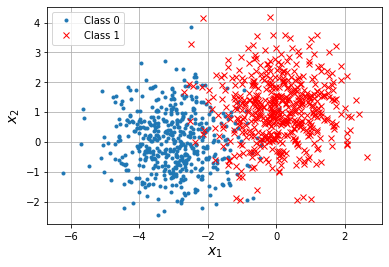

In [ ]:
# Import all necessary libraries.
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

# Define a seed.
seed = 42
# Reset the PN sequence generator.
np.random.seed(seed)
random.seed(seed)

# Number of examples.
N = 1000

# Create a 2-class dataset for classification.
centers = [[-3.0, 0], [0, 1.0]]
X, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

# Plot the classes.
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
fig = plt.figure()
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

 2. Depois de analisar a figura acima, responda:

+ Uma função discriminante linear ou não-linear conseguiria separar estas duas classes de forma perfeita?
+ Qual seria o formato (ou seja, tipo de equação) mais simples (ou seja, menos flexível) para a função discriminante separar estas duas classes ou pelo menos separá-las da melhor forma possível?

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

3. Divida o conjunto total de exemplos em 70% para treinamento e 30% para validação.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classificador_linear_com_limiar_rigido.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classificador_linear_com_limiar_rigido.ipynb).

In [ ]:
# Digite aqui o código do exercício.

4. De posse do formato mais simples que a função discriminante deve ter para separar as duas classes da melhor forma possível, crie as matrizes de atributos de treinamento e validação para que elas implementem este formato de função discriminante.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classificador_linear_com_limiar_rigido.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classificador_linear_com_limiar_rigido.ipynb).

In [ ]:
# Digite aqui o código do exercício.

5. Treine o classificador usando a função `fit` com `alpha = 0.1` e `numEpochs = 2`. Após o treinamento, calcule e imprima a acurácia obtida pelo classificador no conjunto de validação. Calcule a acurácia com os vetores de pesos `a` e `a_min` retornados pela função `fit` e perceba a diferença.

**DICAS**

+ Como a função `fit` já foi definida no exercício 1, não é necessário definí-la novamente, apenas invoque (ou seja, chame) a função.
+ Para calcular a acurácia, use a função `accuracy` definida no item 3 do exercício 1 deste laboratório.
+ Para resolver este item, se baseie no código do seguinte exemplo: [classificador_linear_com_limiar_rigido.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classificador_linear_com_limiar_rigido.ipynb).

In [ ]:
# Digite aqui o código do exercício.

6. Crie um gráfico que mostre os erros de treinamento e validação em função das iterações de aprendizagem.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classificador_linear_com_limiar_rigido.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classificador_linear_com_limiar_rigido.ipynb).

In [ ]:
# Digite aqui o código do exercício.

7. Analisando os resultados mostrados no gráfico acima, responda:

    + O classificador conseguiu encontrar um separador perfeito, ou seja, com erro igual a zero?
    + Os erros de treinamento e validação convergem, ou seja, se estabilizam, para algum valor ou ficam oscilando?
    + O que pode ser feito para se encontrar os pesos do melhor separador possível (i.e., função discriminante) para este problema de classificação?
    + Analise o código da função `fit`, a qual foi definida no item 3 do exercício 1, e diga qual forma foi implementada para se encontrar os pesos do melhor separador possível, mesmo que este não separe as classes perfeitamente.

**DICA**:
+ Reveja os slides 20 e 21 do documento `Classificação (Parte II)`.

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

8. Crie uma figura mostrando as regiões de decisão.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classificador_linear_com_limiar_rigido.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classificador_linear_com_limiar_rigido.ipynb).
+ A matriz de atributos criada para plotar as regiões de decisão também deve ter a mesma forma que as matrizes de atributos criadas para o treinamento e validação.
+ Use o vetor de pesos que resultou no menor erro de validação durante o treinamento, ou seja, `a_min`.

In [ ]:
# Digite aqui o código do exercício.

9. Após analisar o resultado acima, responda:

    + O classificador consegue atingir uma acurácia de 100%? (**Justifique sua resposta**)

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**